# Perkenalan

Nama : Rizqi Golda

Batch : FTDS-018-RMT

Dataset : 'ftds-hacktiv8-project'.phase1_ftds_001_rmt.'heart-failure'

Huggingface : https://huggingface.co/spaces/golda/gagal-jantung-2023

Objective : Menurut laporan dari `dr. Faizal Pamewa Sp.JP` di (https://primayahospital.com/jantung/gagal-jantung/), Badan Kesehatan Dunia masih mencatat penyakit jantung dan pembuluh darah (kardiovaskuler) sebagai ancaman global. Penyakit ini merupakan penyebab utama kematian di dunia, termasuk di Indonesia. Gagal jantung, misalnya, bisa terjadi pada segala kelompok usia dan tergolong kerap menyerang kalangan usia produktif. Gaya hidup yang kurang sehat turut berkontribusi terhadap pertambahan kasus penyakit ini dari tahun ke tahun. Gagal jantung adalah kondisi medis ketika jantung tak bisa bekerja secara efisien sebagaimana mestinya. Secara umum, penyebab gagal jantung antara lain:

    Kerusakan atau penyakit otot jantung
    Masalah pada katup jantung
    Aritmia (gangguan irama detak jantung)
    Hipertensi (tekanan darah tinggi)
    Hipertiroid (gondok yang besar)
    Diabetes
    Anemia (kekurangan sel darah merah)
    Konsumsi alkohol dan obat-obatan terlarang

dalam kesempatan kali ini, saya akan mencoba membuat model machine learning untuk memprediksi apakah pasien akan meninggal atau tidak dengan menggunakan model `random forest` dan `gradient boosting regresor`. diharapkan model dapat memperkecil angka yang diprediksi tidak meninggal namun faktanya meninggal.

# Import Library

memasukkan semua library yang diperlukan selama proses `machine learning`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import pickle
import json
from xgboost import XGBClassifier

# SQL query

memasukkan semua query sql yang digunakan untuk mengambil dataset

SELECT
    *

FROM
    'ftds-hacktiv8-project'.phase1_ftds_001_rmt.'heart-failure'

# Data loading

mengambil data yang diperlukan dari `'ftds-hacktiv8-project'.phase1_ftds_018_rmt.'heart-failure'` yang telah disimpan di lokal dalam bentuk `csv`

In [2]:
dataSheet = pd.read_csv('file:///home/ubuntu/Downloads/h8dsft_P1G3_golda.csv')

melihat 10 data teratas.

In [3]:
dataSheet.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


melihat 10 data terakhir

In [4]:
dataSheet.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


melihat informasi sederhana dari datasheet yang dipunya

In [5]:
dataSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Diketahui dari informasi di atas terdapat 13 kolom dengan 299 baris data di dalam dataframe

mengecek informasi sederhana dari datasheet tersebut.

In [6]:
dataSheet.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis (EDA)

In [7]:
df_EDA = dataSheet.copy()

membuat salinan data untuk keperluan EDA

## melihat jumlah pasien yang mengidap gagal jantung

In [52]:
pd.DataFrame(df_EDA['DEATH_EVENT'].value_counts())

,DEATH_EVENT
0,203
1,96


dari kolom diatas, dapat diketahui bahwa jumlah orang yang tidak mengidap penyakit gagal jantung berjumlah 203 orang dan 96 orang meninggal karena gagal jantung.

## Melihat histogram pada dataset

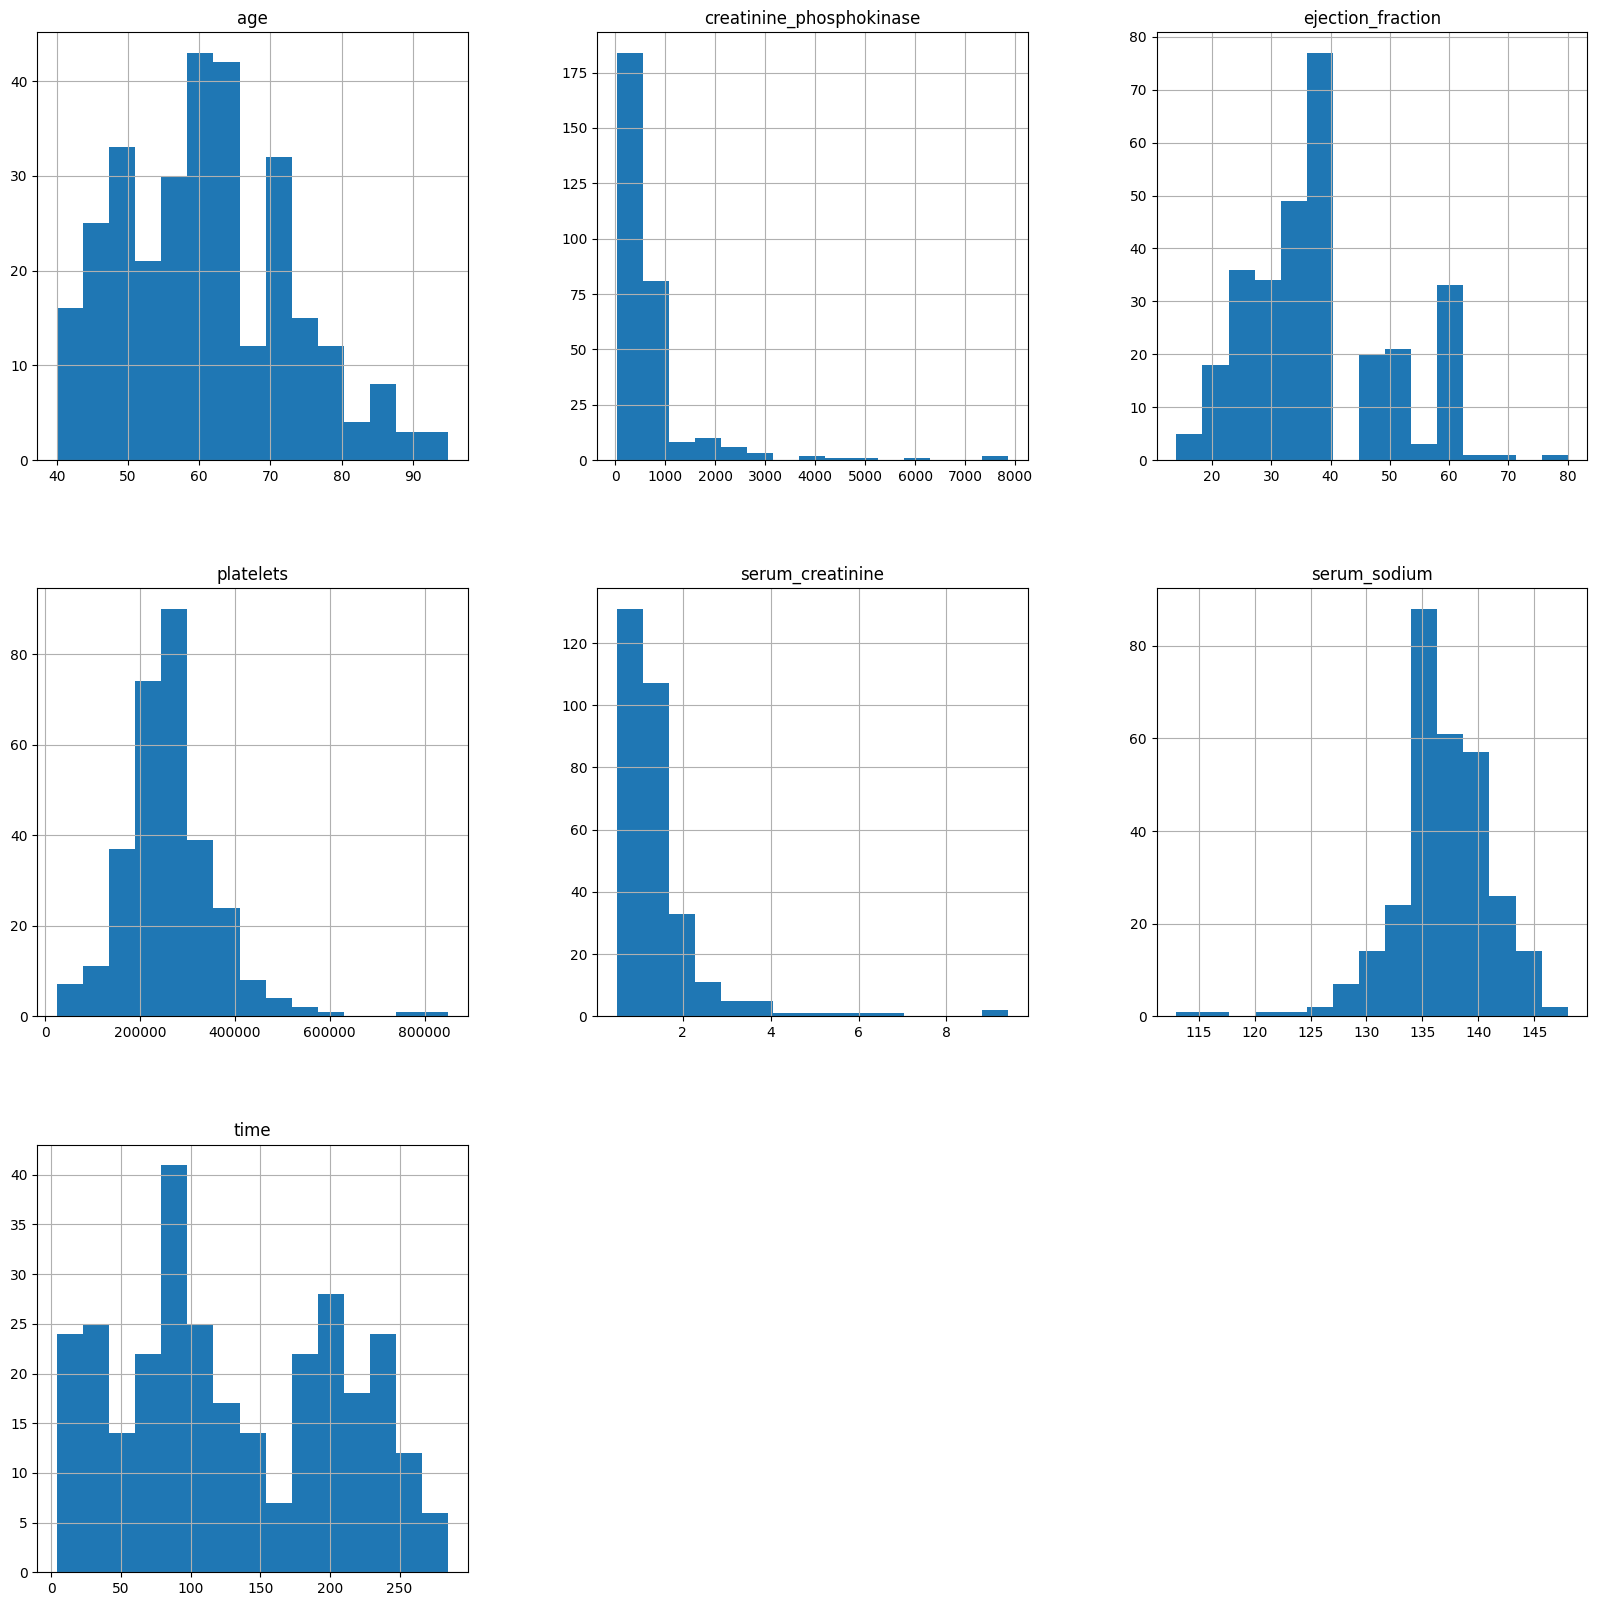

In [9]:
dataSheet[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine","serum_sodium", "time"]].hist(bins=15, figsize=(20, 20))
plt.show()

dari data histogram diatas, didapatkan bahwa pasien termuda berada pada usia 40 tahun dan yang paling tua berada di usia 90 tahun keatas. dengan usia tertinggi diangka 60 tahun. untuk kadar enzim CPK dalam darah diperoleh bahwa pasien terbanyak berada pada kadar 23 sampai 500 mcg/L dengan enzim CPK tertinggi mencapai kadar 7841 mcg/L. Banyaknya jumlah darah yang keluar dari jantung setiap kontraksi memiliki jarak dari 14% sampai 80% dengan rata-rata di kisaran 37% darah. jumlah platelets pada darah berkisar dari 25100 sampai 850000 kiloPlatelets/mL dengan modus di kisaran 250000 sampai 300000 kiloPlatelets/mL. kadar serum kreatinin dalam darah berkisar dari 0,5 sampai 9,4 mg/dL dengan modus 0,5-1 mg/dL. kadar serum sodium berkisar diangka 113 - 148  mEq/Ln dengan modus dikisaran 135 mEq/L. dan waktu *follow up* berkisar dari 4 -285 hari dengan modus di kisaran 70 - 100 hari.

## perbandingan riwayat darah tinggi terhadap kematian karena gagal jantung

In [10]:
# EDA melihat perbandingan pada riwayat darah tinggi terhadap penyakit jantung
HBP = df_EDA[(df_EDA["high_blood_pressure"] == 1)]
non_HBP = df_EDA[(df_EDA["high_blood_pressure"] == 0)]
count1 = HBP["DEATH_EVENT"].value_counts()
count2 = non_HBP["DEATH_EVENT"].value_counts()

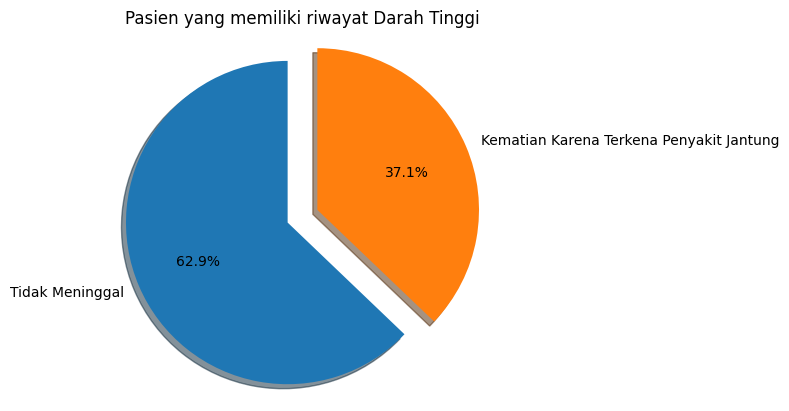

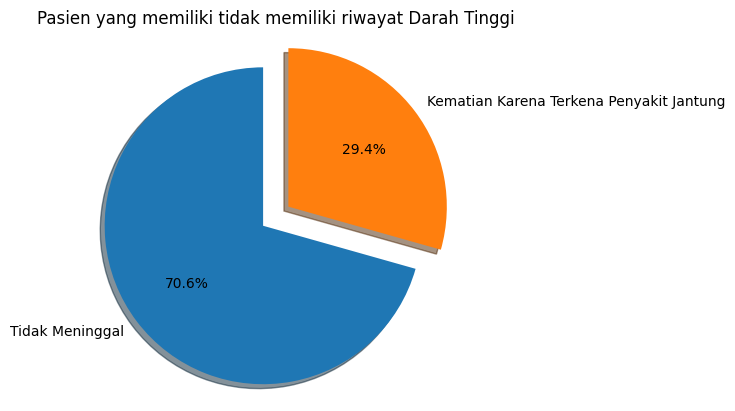

In [11]:
labels = ['Tidak Meninggal', 'Kematian Karena Terkena Penyakit Jantung']
explode = (0.2, 0)

fig1, ax1 = plt.subplots()
ax1.pie(count1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Pasien yang memiliki riwayat Darah Tinggi')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(count2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Pasien yang memiliki tidak memiliki riwayat Darah Tinggi')
plt.show()

dari pie chart diatas, didapati bahwa pasien yang memiliki riwayat darah tinggi akan menambah resiko 30% terkena penyakit gagal jantung daripada pasien yang tidak terkena darah tinggi. 

## perbandingan riwayat diabetes terhadap kematian karena gagal jantung

In [53]:
# EDA melihat perbandingan pada riwayat diabetes terhadap penyakit jantung
DIA = df_EDA[(df_EDA["diabetes"] == 1)]
non_DIA = df_EDA[(df_EDA["diabetes"] == 0)]
count1 = DIA["DEATH_EVENT"].value_counts()
count2 = non_DIA["DEATH_EVENT"].value_counts()

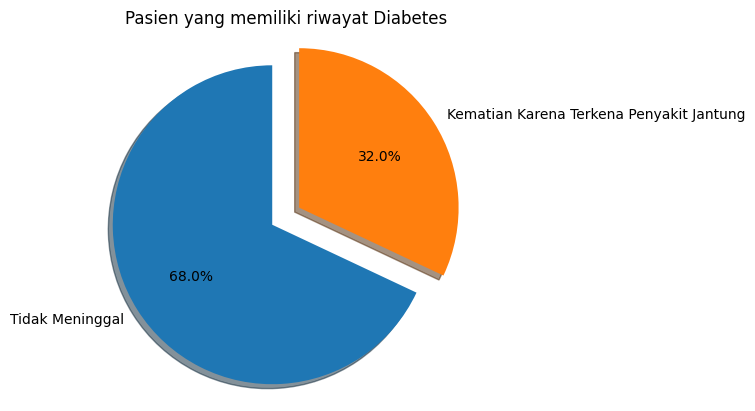

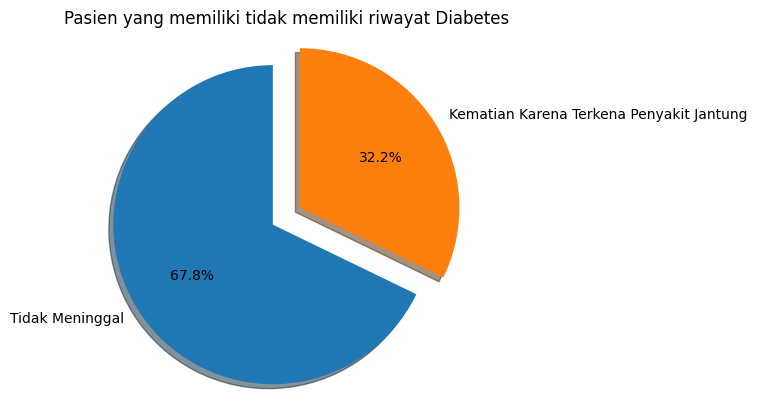

In [54]:
labels = ['Tidak Meninggal', 'Kematian Karena Terkena Penyakit Jantung']
explode = (0.2, 0)

fig1, ax1 = plt.subplots()
ax1.pie(count1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Pasien yang memiliki riwayat Diabetes')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(count2, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Pasien yang memiliki tidak memiliki riwayat Diabetes')
plt.show()

dari pie chart diatas didapati bahwa pasien yang memiliki riwayat diabetes maupun yang tidak memiliki riwayat diabetes, tidak mengalami perbedaan yang signifikan.

## Melihat korelasi data

In [12]:
df_EDA.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


dengan melihat korelasi data set diatas, terdapat beberapa hal yang mempunyai korelasi positif terhadap tingkat kematian karena gagal jantung diantaranya ialah `age, creatinine_phosphokinase, serum_creatinine` sementara data `platelets, serum_sodium, time` memiliki korelasi negatif. hubungan korelasi positif dapat diartikan sebagai "setiap bertambahnya `age, creatinine_phosphokinase, serum_creatinine` maka akan bertambah pula kemungkinan persentase kemungkinan `gagal ginjal` sementara hubungan korelasi negatif dapat diartikan sebagai setiap berkurangnya `platelets, serum_sodium, time` maka akan berdapak pada bertambahnya persentase kemungkinan terjadi `gagal ginjal`. menurut smith (2018), Korelasi Pearson menghasilkan koefesien korelasi yang berfungsi untuk mengukur kekuatan hubungan linier antara dua variabel. 

# Features Enginering

In [13]:
df = dataSheet.copy()

men-duplikat datasheet supaya datanya tidak rusak selama kegiatan berlangsung

## split data train dan test

In [14]:
train, test = train_test_split(df, test_size=0.2, random_state=2)

print('Train Size : ', train.shape)
print('Test Size  : ', test.shape)
train

Train Size :  (239, 13)
Test Size  :  (60, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
53,45.0,0,582,0,38,1,422000.0,0.8,137,0,0,245,0
172,69.0,0,582,1,35,0,228000.0,3.5,134,1,0,30,1
23,65.0,0,167,0,30,0,259000.0,0.8,138,0,0,186,0
98,75.0,0,675,1,60,0,265000.0,1.4,125,0,0,205,0
244,78.0,1,64,0,40,0,277000.0,0.7,137,1,1,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0
22,50.0,0,482,1,30,0,329000.0,0.9,132,0,0,109,0
72,51.0,0,582,1,40,0,221000.0,0.9,134,0,0,244,0
15,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1


Melakukan split terhadap data train dan data test, dengan komposisi 0.2 atau 80/20% dari data frame.

## melihat apa ada missing value pada data latihan

memastikan tidak ada missing value pada data latihan

In [15]:
train.isnull().mean()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

dari hasil yang diberikan diatas, tidak ditemukan data yang hilang pada data latihan.

bila terdapat adanya data yang hilang di data latihan, maka perlu dihapus baris datanya.

In [16]:
train_clean = train.dropna()

## Handling Outlier

In [17]:
# Fungsi untuk membuat histogram dan boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

membuat fungsi `diagnotic_plots` yang berisikan `histogram` dan `boxplot`

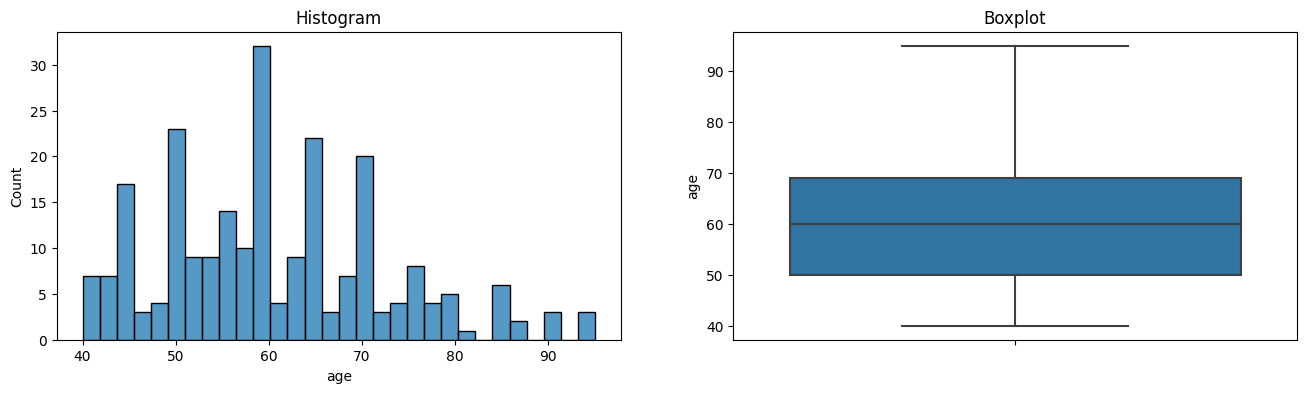

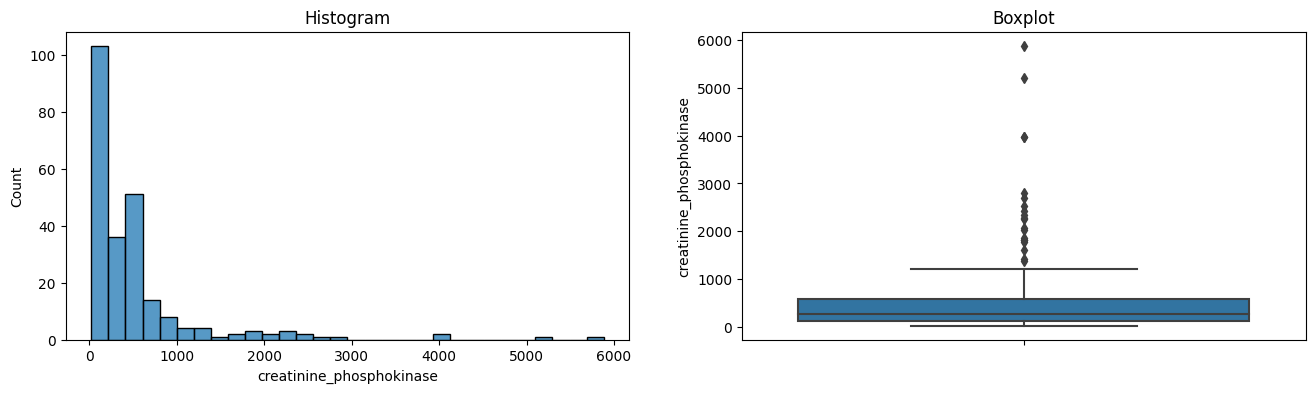

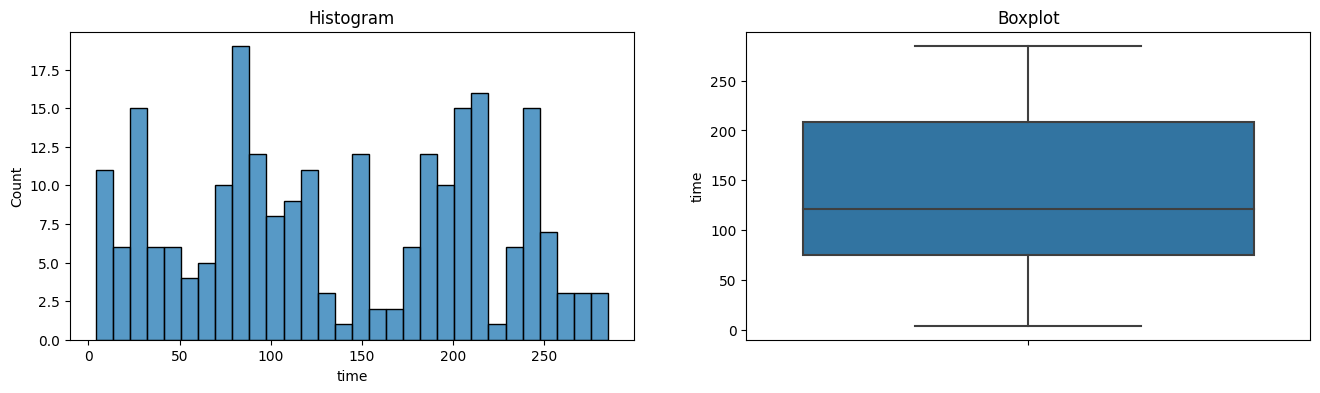

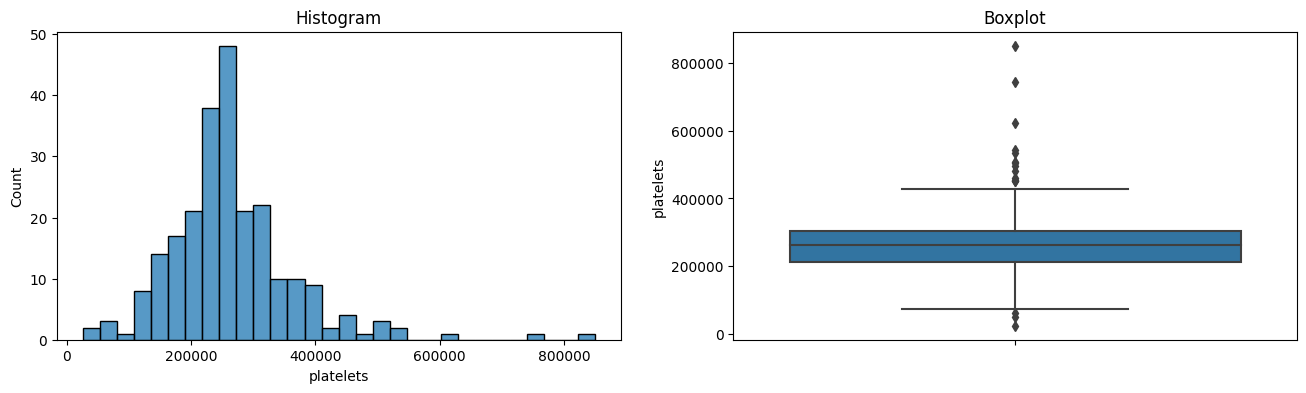

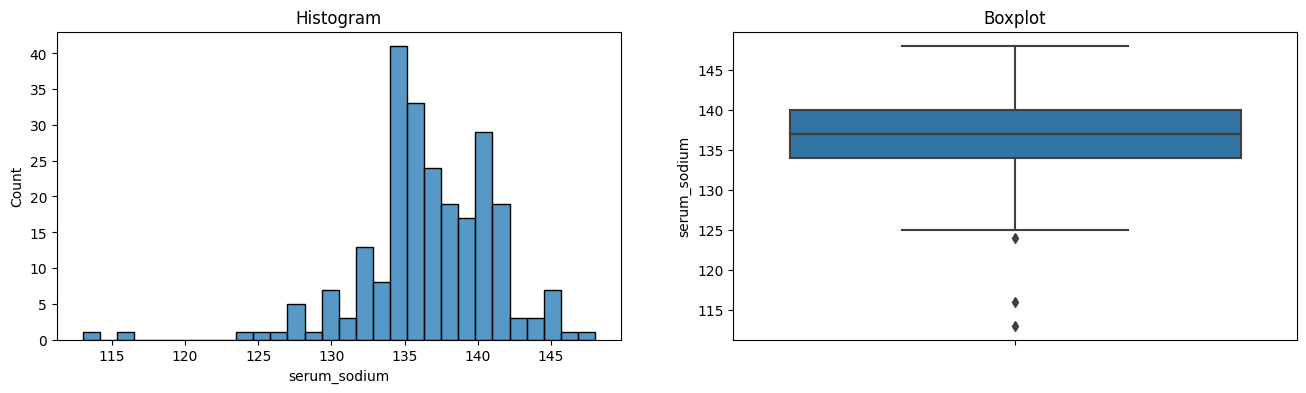

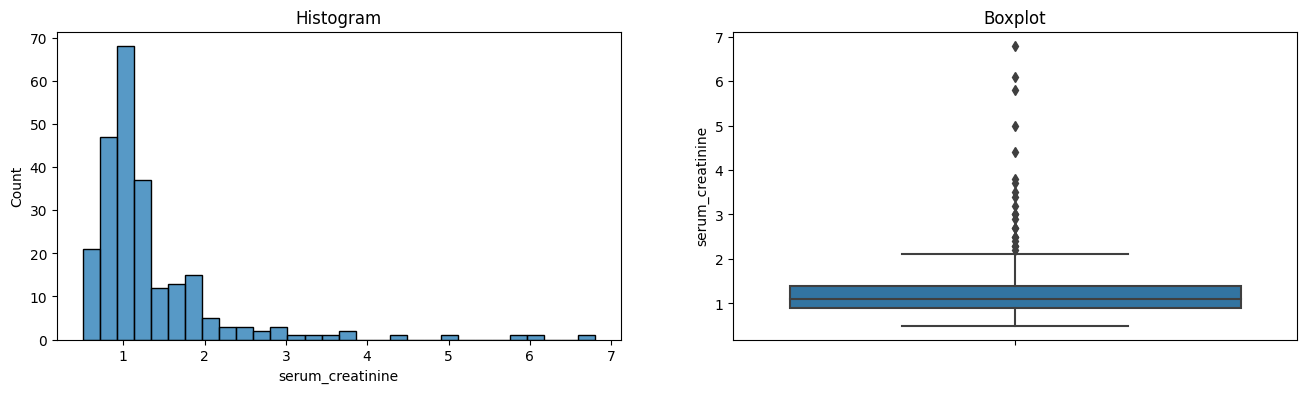

In [18]:
# melihat outlier pada surge multiplier dan distance

diagnostic_plots(train_clean, 'age')
diagnostic_plots(train_clean, 'creatinine_phosphokinase')
diagnostic_plots(train_clean, 'time')
diagnostic_plots(train_clean, 'platelets')
diagnostic_plots(train_clean, 'serum_sodium')
diagnostic_plots(train_clean, 'serum_creatinine')

dari data numerik yang diplotkan diatas, didapati bahwa terdapat outlier di kolom `'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine'` sehingga perlu dilakukan pembersihan data outliernya.

In [19]:
# melihat nilai skewness pada feature numerik
def nilai_skew(df, column):
    for i in column:
        x = df[column].skew()
    print("nilai skewness pada masing-masing kolom adalah :")
    print(x)

membuat rumus mencari `skew`

In [20]:
nilai_skew(train_clean, ['creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine'])

nilai skewness pada masing-masing kolom adalah :
creatinine_phosphokinase    3.770102
platelets                   1.612992
serum_sodium               -1.075462
serum_creatinine            3.448491
dtype: float64


dari data `'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'serum_creatinine'` didapati ada kemiringan yang ekstrim dari kolom tersebut. `skewness` merupakan ukuran ketidaksimetrisan dalam penyebaran data. jadi, dapat diartikan `skewness` yang bernilai positif lebih dari 0 akan membuat ekor dari persebaran datanya condong lebih panjang kekanan serta bila bernilai negatif atau kurang dari 0 maka akan membuat ekor dari persebaran datanya condong lebih panjang ke kiri. sehinggal perlu dilakukannya pembersihan pada data outlier dilihat dari nilai `skewness`nya.

In [21]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

membuat fungsi mencari outlier `upper` dan `lower`.

In [22]:
# Limits for `CP`
CP_upper_limit, CP_lower_limit = find_skewed_boundaries(train_clean, 'creatinine_phosphokinase', 3)

# Flag the outliers in category `CP`
outliers_dis = np.where(train_clean['creatinine_phosphokinase'] > CP_upper_limit, True,
                       np.where(train_clean['creatinine_phosphokinase'] < CP_lower_limit, True, False))

# Let's trimm the dataset

df_trimmed = train_clean.loc[~(outliers_dis)]
print('Size dataset - Before trimming : ', train_clean.shape)
print('Size dataset - After trimming 1: ', df_trimmed.shape)


Size dataset - Before trimming :  (239, 13)
Size dataset - After trimming 1:  (226, 13)


In [23]:
# Limits for `platelets`
Plat_upper_limit, Plat_lower_limit = find_skewed_boundaries(df_trimmed, 'platelets', 3)

# Flag the outliers in category `Plat`
outliers_dis_2 = np.where(df_trimmed['platelets'] > Plat_upper_limit, True,
                       np.where(df_trimmed['platelets'] < Plat_lower_limit, True, False))

# Let's trimm the dataset
df_trimmed_2 = df_trimmed.loc[~(outliers_dis_2)]
print('Size dataset - Before trimming 1: ', df_trimmed.shape)
print('Size dataset - After trimming 2 : ', df_trimmed_2.shape)

Size dataset - Before trimming 1:  (226, 13)
Size dataset - After trimming 2 :  (224, 13)


In [24]:
# Limits for `serum_sodium`
SS_upper_limit, SS_lower_limit = find_skewed_boundaries(df_trimmed_2, 'serum_sodium', 3)

# Flag the outliers in category `Plat`
outliers_dis_3 = np.where(df_trimmed_2['serum_sodium'] > SS_upper_limit, True,
                       np.where(df_trimmed_2['serum_sodium'] < SS_lower_limit, True, False))

# Let's trimm the dataset
df_trimmed_3 = df_trimmed_2.loc[~(outliers_dis_3)]
print('Size dataset - Before trimming 2: ', df_trimmed_2.shape)
print('Size dataset - After trimming 3 : ', df_trimmed_3.shape)

Size dataset - Before trimming 2:  (224, 13)
Size dataset - After trimming 3 :  (222, 13)


In [25]:
# Limits for `serum_creatinine`
SC_upper_limit, SC_lower_limit = find_skewed_boundaries(df_trimmed_3, 'serum_creatinine', 3)

# Flag the outliers in category `serum_creatinine`
outliers_dis_4 = np.where(df_trimmed_3['serum_creatinine'] > SC_upper_limit, True,
                       np.where(df_trimmed_3['serum_creatinine'] < SC_lower_limit, True, False))

# Let's trimm the dataset
df_trimmed_4 = df_trimmed_3.loc[~(outliers_dis_4)]
print('Size dataset - Before trimming 3: ', df_trimmed_3.shape)
print('Size dataset - After trimming 4 : ', df_trimmed_4.shape)

Size dataset - Before trimming 3:  (222, 13)
Size dataset - After trimming 4 :  (210, 13)


In [26]:
print('Size dataset - Before trimming : ', train_clean.shape)
print('Size dataset - After trimming 4: ', df_trimmed_4.shape)

Size dataset - Before trimming :  (239, 13)
Size dataset - After trimming 4:  (210, 13)


setelah dilakukan pembersihan data latihan, terdapat 29 data yang hilang dari dataset. 

## split data input dan output

In [27]:
X_train = df_trimmed_4.drop(['DEATH_EVENT'], axis=1)
X_test = test.drop(['DEATH_EVENT'], axis=1)

y_train = df_trimmed_4['DEATH_EVENT']
y_test = test['DEATH_EVENT']

data `DEATH_EVENT` akan saya jadikan `output`, dan sisanya akan saya jadikan sebagai `input` nya

## split data numerical dan data categorical

In [28]:
X_num = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_cat = ['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking']


data numerik terdiri dari `'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'` dan data kategori terdiri dari `'sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking'`.

In [29]:
X_train_num = df_trimmed_4[X_num]
X_test_num = X_test[X_num]

X_train_cat = df_trimmed_4[X_cat]
X_test_cat = X_test[X_cat]

dimasukkan data numerik dan data ketegorik pada data train dan data tes.

## encoding

melakukan `encoding` pada `data kategori` guna dapat dihitung dengan `maching learning`

In [30]:
encoder = OrdinalEncoder(categories=[[0,1],[0,1],[0,1],[0,1],[0,1]])

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

saya menggunakan metode `ordinalencoder` dikarenakan adanya ranking pada setiap kolom kategorinya.

## scaling

melakukan `scaling` pada `data numerik` guna dapat dihitung dengan `maching learning`

In [31]:
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

saya menggunakan metode `StandardScaler` dalam *scaling* di data numerik dikarenakan outlier pada data yang diperoleh sudah saya coba bersihkan.

## concate

menggabungkan semua `data kategori` dan `data numerikal` pada `data latihan` dan `data tes`

In [32]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_train_final

array([[-1.29440107,  0.53338596,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.36272673, -0.61370185, -0.69595922, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.19129063,  0.79044419,  1.91388785, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.79726273,  0.53338596,  0.1739898 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.36272673, -0.72150046, -0.69595922, ...,  1.        ,
         1.        ,  0.        ],
       [-0.05155522, -0.36493582, -0.69595922, ...,  1.        ,
         0.        ,  1.        ]])

# Model Definition

menentukan beberapa tipe `model` yang digunakan pada `maching learing` kali ini, yaitu dengan `random forest` dan `adaboost`

In [33]:
rnd_clf = RandomForestClassifier()
AdaBoost = AdaBoostClassifier()

# Model Training

In [34]:
rnd_clf.fit(X_train_final, y_train)
AdaBoost.fit(X_train_final, y_train)

AdaBoostClassifier()

saya coba melakukan pelatihan pada komputer dengan data yang telah saya sediakan dan metode yang telah disediakan pula.

# Model Evaluation

## random forest

### mencari parameter terbaik

disini saya memberikan beberapa parameter guna dibuatkan model `random forest` terbaik yang dinilai dengan melihat nilai `recall`-nya.

In [35]:
n_estimators = [10, 50, 100]
criterion = ['gini', 'entropy', 'log_loss']
grid_search_rnd = {'n_estimators': n_estimators,
               'criterion':criterion}
grid_search_rnd

{'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy', 'log_loss']}

disini saya menentukan untuk parameter `criterion` disediakan `'gini', 'entropy', 'log_loss'` dan untuk `n_estimators` disediakan `10, 50, 100`.

In [36]:
rnd_grid = GridSearchCV(estimator=rnd_clf,
                         param_grid=grid_search_rnd,
                         scoring='recall')

rnd_grid.fit(X_train_final, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

pada model `random forest` dilakukan pencarian parameter terbaik dari parameter yang telah disediakan dengan metode `grid search` yang dinilai dari nilai `recall`

In [37]:
rnd_grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

parameter `random forest` terbaik ada pada `criterion` = `log_loss` dan `n_estimators` = `50`.

### melakukan pengujian pada data train dan tes untuk model yang dasar dan model yang telah di *tunning*

In [38]:
rnd_best = rnd_grid.best_estimator_
aa = rnd_best.score(X_train_final, y_train)
aa_2 = rnd_best.score(X_test_final, y_test)
aa_3 = rnd_clf.score(X_train_final, y_train)
aa_4 = rnd_clf.score(X_test_final, y_test)
print('score random forrest train before tuning : ', aa_3)
print('score random forrest test before tuning  : ', aa_4)
print('score random forrest train after tuning : ', aa)
print('score random forrest test after tuning  : ', aa_2)

score random forrest train before tuning :  1.0
score random forrest test before tuning  :  0.7833333333333333
score random forrest train after tuning :  1.0
score random forrest test after tuning  :  0.7666666666666667


model tersebut diujikan pada data latihan dan data tes, makan hasil didapatkan bahwa model sebelum dan setelah tuning dapat menentukan semua kelas di data latihan, tetapi pada data tes hanya mampu mendapatkan hasil 75% pada model sebelum tuning dan 73,3% pada model setelah tuning

### confusion matrix

#### model diujikan pada data latihan sebelum dan sesudah tuning

In [39]:
y_pred_fin_1 = rnd_clf.predict(X_train_final)
y_pred_fin_2 = rnd_best.predict(X_train_final)

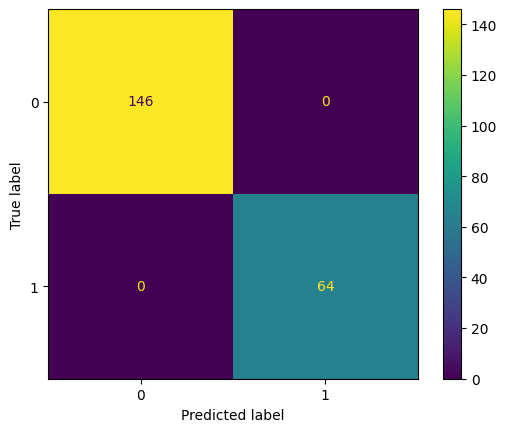

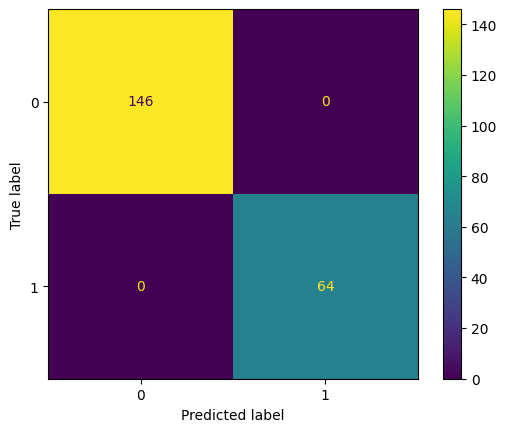

In [55]:
cm_train_rnd_bt = confusion_matrix(y_train, y_pred_fin_1)
ConfusionMatrixDisplay(cm_train_rnd_bt).plot()
cm_train_rnd_at = confusion_matrix(y_train, y_pred_fin_2)
ConfusionMatrixDisplay(cm_train_rnd_bt).plot()

dari kedua confusion matrix yang ditampilkan, tidak terjadi prediksi yang meleset antara model sebelum dan setelah tuning.

#### data tes sebelum dan sesudah tuning

In [56]:
y_pred_fin_3 = rnd_clf.predict(X_test_final)
y_pred_fin_4 = rnd_best.predict(X_test_final)

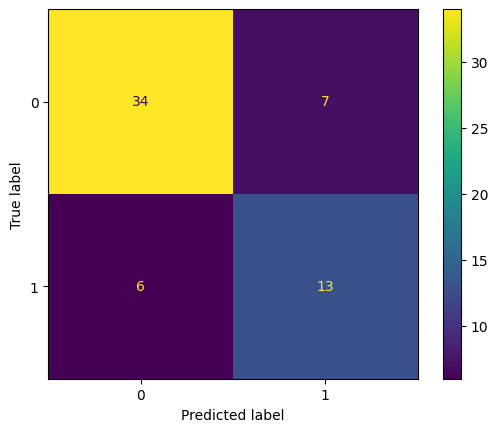

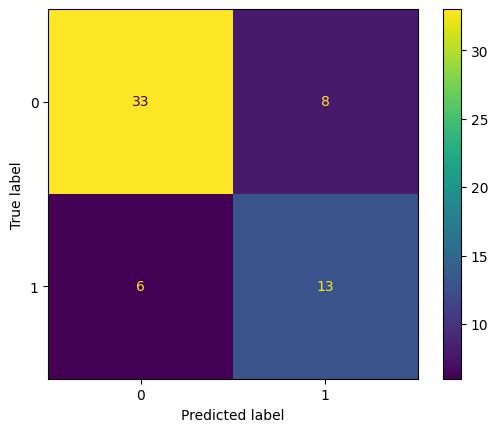

In [42]:
cm_test_rnd_bt = confusion_matrix(y_test, y_pred_fin_3)
ConfusionMatrixDisplay(cm_test_rnd_bt).plot()
cm_test_rnd_at = confusion_matrix(y_test, y_pred_fin_4)
ConfusionMatrixDisplay(cm_test_rnd_at).plot()

dari kedua confusion matrix yang ditampilkan, terjadi nilai false negatifnya meleset antara model sebelum dan setelah tuning pada data tes.

### kesimpulan

dengan model random forest, diketahui bahwa model yang dilakukan tuning menjadi lebih buruk hasilnya ketimbang sebelum dilakukan tuning dan model yang didapatkan sangat `overfit`

## Adaboost classifier

### scoring

disini saya memberikan beberapa parameter guna dibuatkan model `Adaboost classifier` terbaik yang dinilai dengan melihat nilai `recall`-nya.

In [43]:
algorithm = ['SAMME', 'SAMME.R']
n_estimators = [10, 50, 100]
grid_search_ADA = {'algorithm': algorithm,
               'n_estimators':n_estimators}
grid_search_ADA

{'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [10, 50, 100]}

disini saya menentukan untuk parameter `algorithm` disediakan `'SAMME', 'SAMME.R'` dan untuk `n_estimators` disediakan `10, 50, 100`.

In [44]:
Ada_grid = GridSearchCV(estimator=AdaBoost,
                         param_grid=grid_search_ADA,
                         scoring='recall')

Ada_grid.fit(X_train_final, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [10, 50, 100]},
             scoring='recall')

pada model `Adaboost` dilakukan pencarian parameter terbaik dari parameter yang telah disediakan dengan metode `grid search` yang dinilai dari nilai `recall`

In [45]:
Ada_grid.best_params_

{'algorithm': 'SAMME', 'n_estimators': 10}

parameter `Adaboost` terbaik ada pada `algorithm` = `SAMME` dan `n_estimators` = `10`.

In [46]:
Ada_best = Ada_grid.best_estimator_
bb = Ada_best.score(X_train_final, y_train)
bb_2 = Ada_best.score(X_test_final, y_test)
bb_3 = AdaBoost.score(X_train_final, y_train)
bb_4 = AdaBoost.score(X_test_final, y_test)
print('score Adaboost train before tuning : ', bb_3)
print('score Adaboost test before tuning  : ', bb_4)
print('score Adaboost train after tuning : ', bb)
print('score Adaboost test after tuning  : ', bb_2)

score Adaboost train before tuning :  0.9952380952380953
score Adaboost test before tuning  :  0.8
score Adaboost train after tuning :  0.9095238095238095
score Adaboost test after tuning  :  0.75


### confusion matrix

#### model diujikan pada data latihan sebelum dan sesudah tuning

In [47]:
y_pred_fin_5 = AdaBoost.predict(X_train_final)
y_pred_fin_6 = Ada_best.predict(X_train_final)

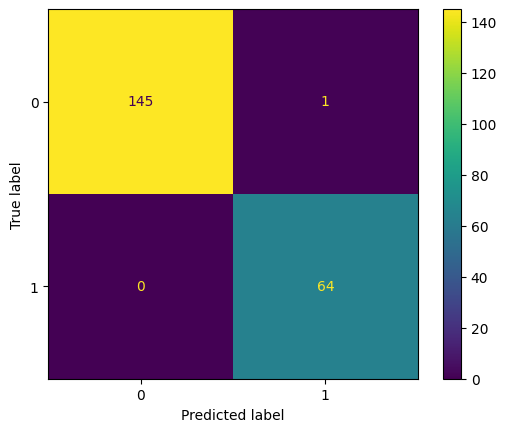

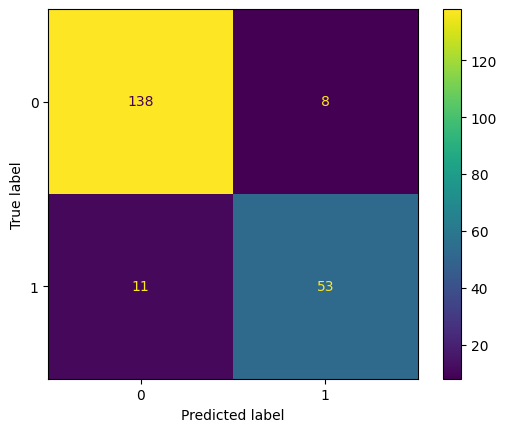

In [48]:
cm_train_ada_bt = confusion_matrix(y_train, y_pred_fin_5)
ConfusionMatrixDisplay(cm_train_ada_bt).plot()
cm_train_ada_at = confusion_matrix(y_train, y_pred_fin_6)
ConfusionMatrixDisplay(cm_train_ada_at).plot()

dari kedua confusion matrix yang ditampilkan, nilai pada model setelah *tuning* `false negatif, false positif, true positif, true negatif` lebih buruk ketimbang model sebelum *tuning* pada data latihan.

#### model diujikan pada data tes sebelum dan sesudah tuning

In [49]:
y_pred_fin_7 = AdaBoost.predict(X_test_final)
y_pred_fin_8 = Ada_best.predict(X_test_final)

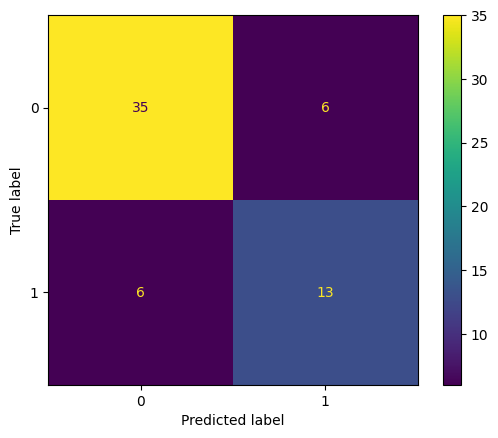

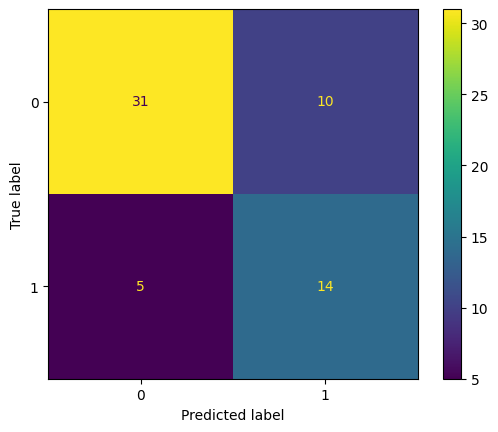

In [50]:
cm_test_ada_bt = confusion_matrix(y_test, y_pred_fin_7)
ConfusionMatrixDisplay(cm_test_ada_bt).plot()
cm_test_ada_at = confusion_matrix(y_test, y_pred_fin_8)
ConfusionMatrixDisplay(cm_test_ada_at).plot()

dari kedua confusion matrix yang ditampilkan, nilai pada model setelah *tuning* `false negatif, false positif, true positif, true negatif` lebih buruk ketimbang model sebelum *tuning* pada data tes.

### kesimpulan

dengan model adaboost, diketahui bahwa model yang dilakukan tuning menjadi lebih buruk hasilnya ketimbang sebelum dilakukan tuning dan model yang didapatkan sangat `overfit`

# Model Inference

In [51]:
with open('Adaboost.pkl', 'wb') as file_1:
  pickle.dump(Ada_best, file_1)

with open('randomForest.pkl', 'wb') as file_2:
  pickle.dump(rnd_best, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('list_num_cols.txt', 'w') as file_5:
  json.dump(X_num, file_5)

with open('list_cat_cols.txt','w') as file_6:
  json.dump(X_cat, file_6)


# Conceptual Problems

#### Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging (Bootstrap Aggregating) adalah teknik ensemble learning yang menggabungkan beberapa model machine learning yang sama, tetapi dilatih pada subset acak dari data pelatihan. Setiap model memberikan prediksi yang independen dan kemudian hasil prediksi dari semua model diambil rata-ratanya. Teknik ini bertujuan untuk mengurangi overfitting, membuat hasil semakin robust, dan meningkatkan akurasi prediksi.

#### Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !


Random forest adalah metode ensemble learning yang menggunakan banyak pohon keputusan secara acak. Setiap pohon dibangun pada subset acak dari data pelatihan, dengan variabel acak yang dipilih untuk setiap pemisahan node. Kemudian, hasil prediksi dari semua pohon diambil rata-ratanya untuk memberikan prediksi akhir. Teknik ini bertujuan untuk meningkatkan akurasi dan mencegah overfitting.

Adaboosting adalah metode ensemble learning yang berfokus pada peningkatan kinerja model machine learning dengan memberikan penekanan lebih pada data yang salah diklasifikasikan. Pada setiap iterasi, bobot diberikan pada sampel pelatihan sehingga model berfokus pada sampel yang salah diklasifikasikan. Model berikutnya diberi lebih banyak bobot pada sampel yang salah diklasifikasikan sebelumnya untuk menciptakan model yang lebih akurat.

# Kesimpulan

dengan uji yang telah dilakukan, ternyata terdapat beberapa data yang memiliki `outlier`. dengan literasi yang menunjukkan bahwa terdapat beberapa hal yang menyebabkan penyakit gagal jantung muncul, antara lain dilihat dari nilai Hipertensi (tekanan darah tinggi), Diabetes dan lain-lain . terdapat 96 pasien yang mengidap gagal jantung dan 203 pasien yang tidak mengidap gagal jantung. dilakukan pengerjaan model untuk menentukan kategori `DEATH_EVENT` dengan model `random forest` dan `Adaboost`. kedua model memiliki nilai score yang sangat overfit sehingga tidak baik hasilnya. untuk memperbaiki nilai scoring pada model, dapat dilakukan perbaikan pada data yang diperoleh agar datanya lebih seimbang, atau dilakukan `undersampling` maupun `oversampling` pada data diatas.

# reference

https://primayahospital.com/jantung/gagal-jantung/